## Haberman Cancer Survival dataset - Exploratory Data Analysis using Python

#### Data Description
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.


#### Attribute Information

age - Age of patient at time of operation (numerical) <br>
year - Patient's year of operation (year - 1900, numerical) <br>
nodes - Number of positive axillary nodes detected (numerical) <br>
status - Survival status (class attribute) 1 = the patient survived 5 years or longer :: 2 = the patient died within 5 years <br>

Objective is to predict whether the patient will survive after 5 years or not based upon the patient’s age, year of treatment and the number of positive lymph nodes.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
haberman = pd.read_csv('haberman.csv')
haberman.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [2]:
haberman.shape

(306, 4)

In [3]:
haberman['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

Observation :
We have total 305 data elements
Has 4 columns including class variable and all are of type Numerical
3 are feature/Independent Variables (Age, Year of operation, axillary nodes)
Survival status is the class variable/Predictor/Dependent Variable
Out of 305 there are 224 data elements as Survival status 1 and 81 data elements as Survival status 2
So this imbalanced data set (since data element count for class variable is not same for all classifications)

In [4]:
haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [5]:
# as per attribute information provided to us, 
# 1 = the patient survived 5 years or longer 2 = the patient died within 5 year
# changing the values 1 to survived and 2 to died
haberman['status'] = haberman['status'].map({1: 'survived', 2: 'died'})

## Scatter Plot

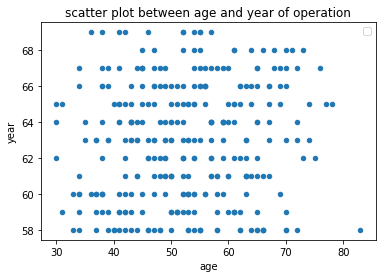

In [6]:
# Plot a scatterplot for Age and  Year of operation
haberman.plot(kind = 'scatter' , x = 'age',y = 'year')
plt.title("scatter plot between age and year of operation")
plt.legend('age','year')
plt.show()

#### Observation(s):

From the above graph we observe that age and year is not helpful in analysis

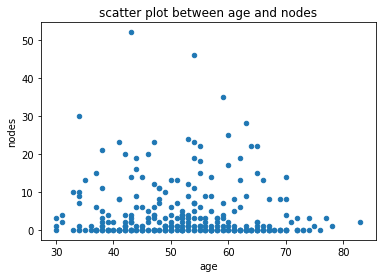

In [7]:
haberman.plot(kind = 'scatter',x='age',y = 'nodes')
plt.title('scatter plot between age and nodes')
plt.show()

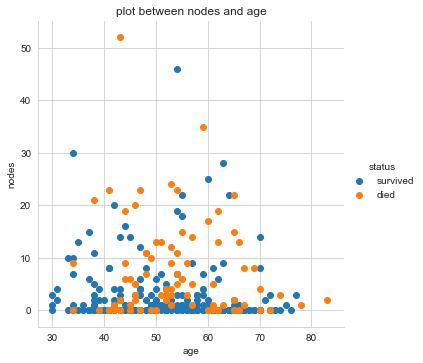

In [8]:
sb.set_style("whitegrid")
sb.FacetGrid(data=haberman,hue = 'status',size =5).map(plt.scatter,'age','nodes').add_legend()
plt.title('plot between nodes and age')
plt.show()

#### Observation(s):

1. Using 'age' and 'nodes' features, we can observe that most of the nodes are located at 0
2. age and nodes are not linearly separable,hence we can't make any decision based regarding the patient survival

## Multivariate Analysis
### Pair-plot

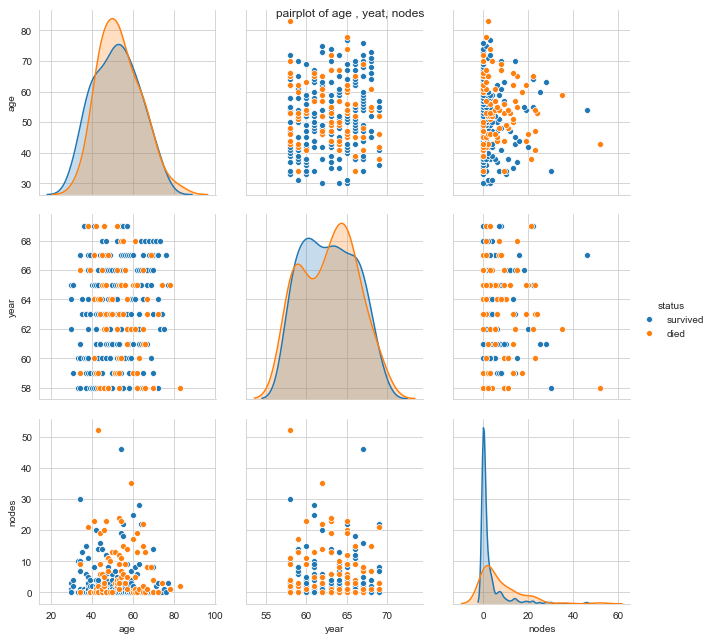

In [9]:
# pairwise scatter plot: Pair-Plot
plt.close()
sb.set_style('whitegrid')
sb.pairplot(haberman,hue ='status', vars=['age','year','nodes'],size =3)
plt.suptitle("pairplot of age , yeat, nodes")
plt.show()

1.The diagonals represents the PDF's of each feature and suggests that the classes are not easily separable <br>
2.It seems to be no clear linear separation between the two classes. <br>
3.No plot is useful for classification.From the above plots we are unable to identify useful features <br>


## 4. Uni variate Analysis

### Histogram, PDF, CDF

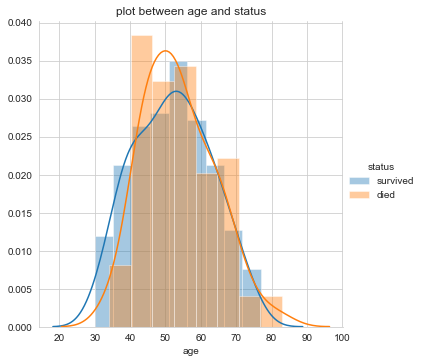

In [10]:
sb.FacetGrid(haberman, hue = 'status' ,size =5)\
   .map(sb.distplot,'age') \
   .add_legend()
plt.title("plot between age and status")
plt.show()

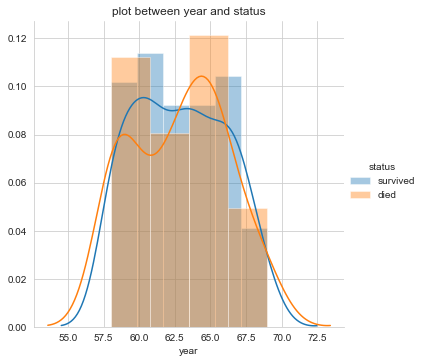

In [11]:
sb.FacetGrid(haberman, hue = 'status' ,size =5).map(sb.distplot,'year').add_legend()
plt.title("plot between year and status")
plt.show()

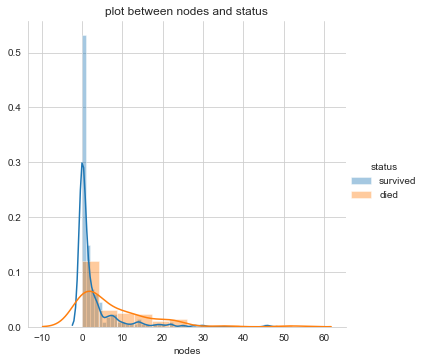

In [12]:
sb.FacetGrid(haberman, hue ='status',size = 5).map(sb.distplot,'nodes').add_legend()
plt.title('plot between nodes and status')
plt.show()

**Observation:**  

1. From the above PDFs both Age and year are not good features for useful insights as the distribution is more similar for both people who survived and also dead.

2. The axillary nodes is the most important feature to predict the survival status after 5 years as there is less overlap of graphs. Roughly the survival rate is extremely high for patients having less than 3 axillary nodes.


## CDF

In [13]:
haberman_survived= haberman[haberman['status']== 'survived']
haberman_died = haberman[haberman['status'] == 'died']

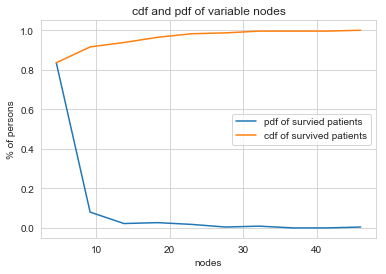

In [14]:
count , bin_edges = np.histogram(haberman_survived['nodes'],bins =10,density = True)
pdf = count/(sum(count))
cdf= np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel('nodes')
plt.ylabel('% of persons')
plt.legend(['pdf of survied patients','cdf of survived patients'])
plt.title('cdf and pdf of variable nodes')
plt.show()

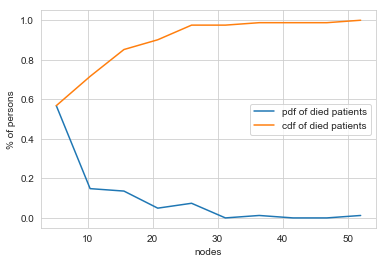

In [15]:
count , bin_edges = np.histogram(haberman_died['nodes'], bins = 10 ,density =True)

pdf = count/sum(count)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.ylabel('% of persons')
plt.xlabel("nodes")
plt.legend(['pdf of died patients','cdf of died patients'])
plt.show()

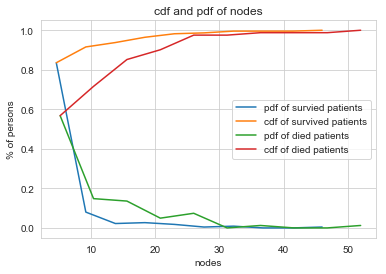

In [16]:
# Plots of CDF of survived status for survived and died

count , bin_edges = np.histogram(haberman_survived['nodes'],bins =10,density = True)
pdf = count/(sum(count))
cdf= np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend([])

count , bin_edges = np.histogram(haberman_died['nodes'], bins = 10 ,density =True)

pdf = count/sum(count)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.title('cdf and pdf of nodes')
plt.legend(['pdf of survied patients','cdf of survived patients','pdf of died patients','cdf of died patients'])
plt.xlabel('nodes')
plt.ylabel('% of persons')
plt.show()

**Observation**

1. Maximum no of persons who survived have less than 3 axillary nodes.
2. The Person with high number of axillary nodes have less probability of surviving
3. The probability distribution function(PDF) for the people who survived and those who died different in case of axillary    
   nodes. Hence, axillary nodes is the most important feature to predict the survival status after 5 years

## Box plot and Whiskers

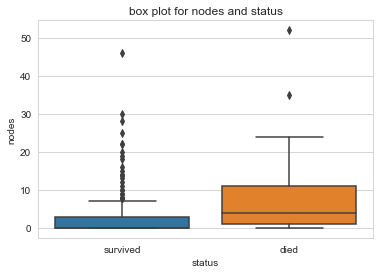

In [23]:
#Box-plot can be visualized as a PDF on the side-ways.

sb.boxplot(x='status',y= 'nodes',data = haberman)
plt.title("box plot for nodes and status")
plt.show()


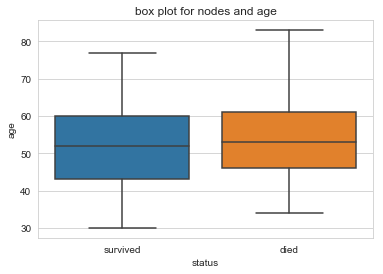

In [21]:
sb.boxplot(x='status',y= 'age',data = haberman)
plt.title("box plot for nodes and age")
plt.show()


**Observation:**
From the above plot between the age and survival status we can observe that upper limit of patients age is almost equal and ranges of survived class and died classes are over lapped.Hence age variable is not good to get concusion

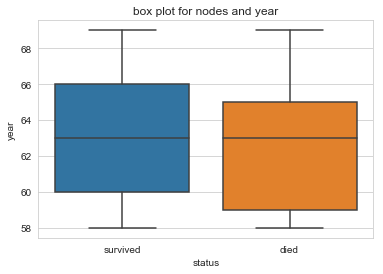

In [22]:

sb.boxplot(x='status',y= 'year',data = haberman)
plt.title("box plot for nodes and year")
plt.show()

**Observation:**
From the above plot between the year and survival status we can observe that 
for the patients year of operation ranges between 60-66 for survival class and 59-63 for died class
we can't get any conclusion from above plot as there are so many points are over lapped.

## Violin plots

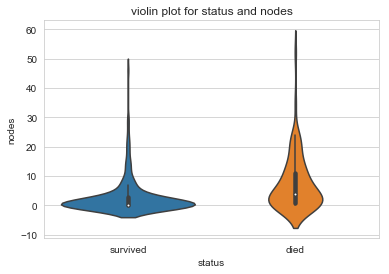

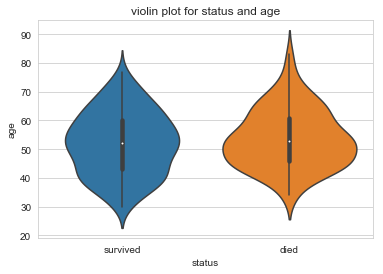

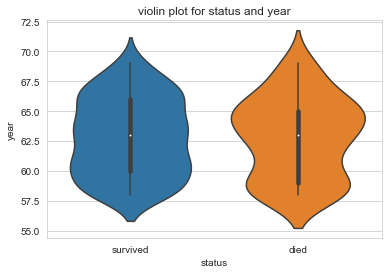

In [18]:
sb.violinplot(x='status',y='nodes',data = haberman)
plt.title('violin plot for status and nodes')
plt.show()

sb.violinplot(x='status',y='age',data = haberman)
plt.title('violin plot for status and age')
plt.show()

sb.violinplot(x='status',y='year',data = haberman)
plt.title('violin plot for status and year')
plt.show()


**Observation:**

1. The number of positive lymph nodes of the survivors is highly dense from 0 to 5.
2. Almost 80% of the patients have less than or equal to 5 positive lymph survived more than 5 years.
3. From box plots and violin plots, we can say that more no of patients who are dead have age between 46-62,year between 59-65   
   and the patients who survived have age between 42-60, year between 60-66.

## Multivariate probability density, contour plot.


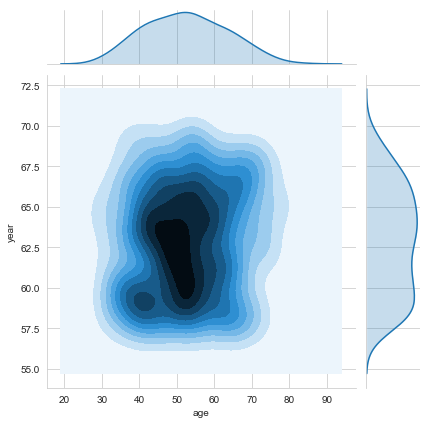

In [19]:
sb.jointplot(x='age',y='year',data=haberman,kind='kde')
plt.show()

**Observation:**
In between the ages of 43-58 more number of people undergone opetaion during 1959 - 1964

## Conclusions:

1. There are 306 observations with 4 features in the data set.
2. It is an imbalanced dataset with- 225 patients survived 5 years or longer and 81 patients died within 5 years
3. The given dataset is not linearly separable for each class. There are too much overlapping in the data-points and hence it is very difficult to classify
4. age and year features have overlapping curves hence it is difficult to find the survival status.
5. nodes is the only helpful feature to know about the survival status of patients as there is difference between the distributions for both classes
6. most of the people who survived have 0 positive nodes
7. No of person who possess high no of axillary nodes indicates that they have high probability of not surviving.
8. The least useful attribute to predict the survival status of person is 'year of operation'
9. By plotting all pdf, cdf, box-plot, pair plots, scatter plot etc. we get only one conclusion
   if number of axillary node is less, than survival of patients is more.We need more features to comes on very good conlusion. 